In [1]:
import pandas as pd
import   numpy as np              #maths calculation
from  datetime import datetime     #to acces date
import matplotlib.pyplot as plt # for plotting graph
from pandas import Series   # to work on series
%matplotlib inline
import warnings        #to ignore warnings warnings.filterwarnings("ignore")

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [4]:
# for not lossing orginal data lets make copy
train_original=train.copy()
test_original=test.copy()

In [5]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
test.head()


,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [7]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
A=9
print ('%.3f'%A)


9.000


In [9]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [10]:
train.shape

(18288, 3)

In [11]:
test.shape

(5112, 2)

In [12]:
train_original

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [13]:
train['Datetime']=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime']=pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format="%d-%m-%Y %H:%M")
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format="%d-%m-%Y %H:%M")




In [14]:
for i in (train,test,test_original,train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour  

In [15]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']
temp.head()

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [16]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2



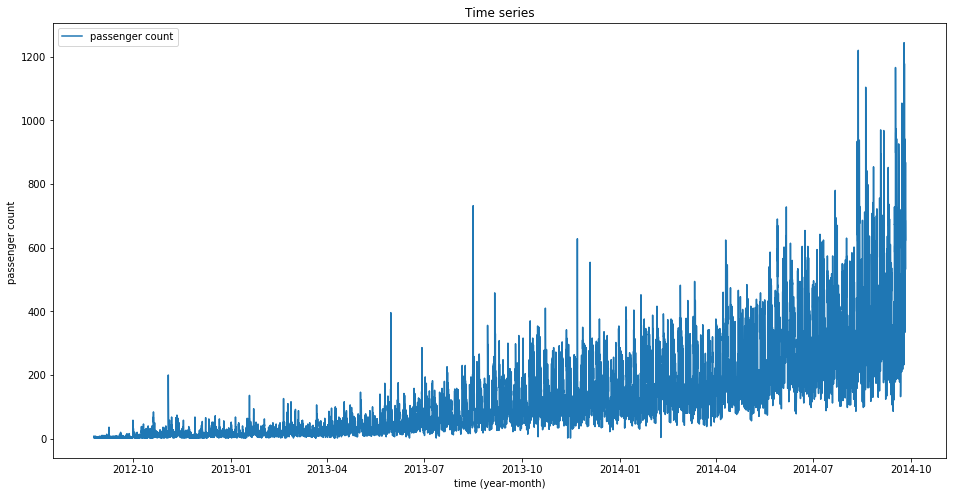

In [17]:
train.index=train['Datetime'] #indexing the datetime to get the time period on the x-axis
df=train.drop('ID',1)# DROP ID TO GET ONLY date time on x-axis
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger count')
plt.title('Time series')
plt.xlabel("time (year-month)")
plt.ylabel("passenger count ")
plt.legend(loc='best')


















In [18]:
#train.groupby('year')['Count'].mean.plot.bar()

In [19]:
t=train['Count']

t=pd.DataFrame(t)


t

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


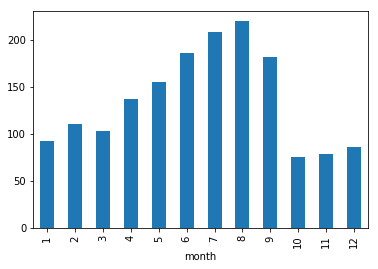

In [20]:
train.groupby('month')['Count'].mean().plot.bar()

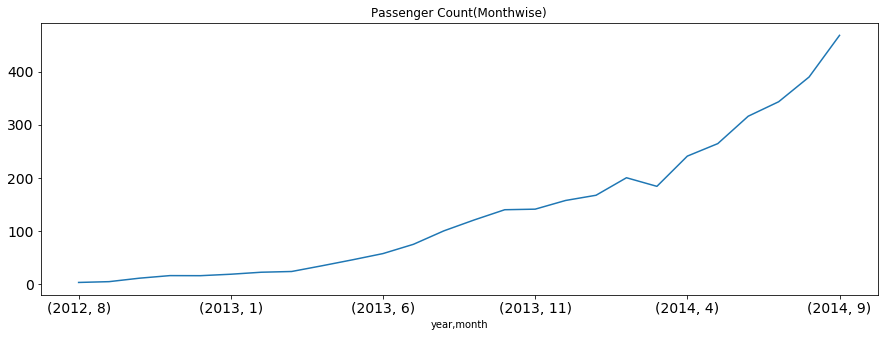

In [21]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

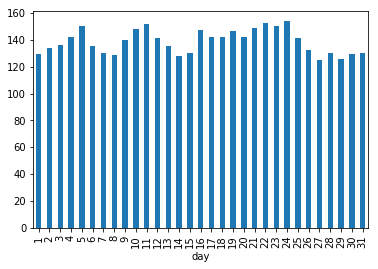

In [22]:
train.groupby('day')['Count'].mean().plot.bar()

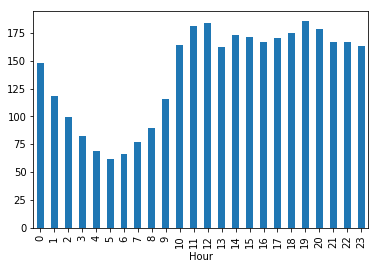

In [23]:
train.groupby('Hour')['Count'].mean().plot.bar()

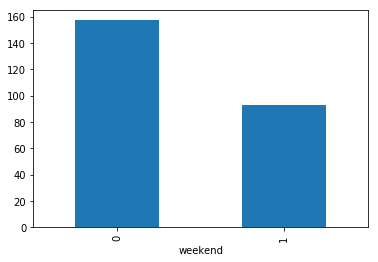

In [24]:
train.groupby('weekend')['Count'].mean().plot.bar()

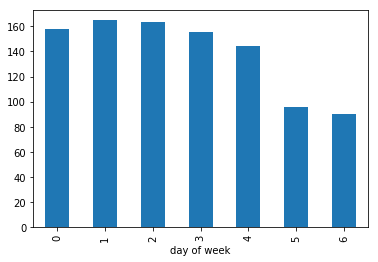

In [25]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [26]:
train=train.drop('ID',1)

In [27]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

In [28]:
print(weekly)

                 Count    year     month        day  Hour  day of week  \
Datetime                                                                 
2012-08-26    3.416667  2012.0  8.000000  25.500000  11.5          5.5   
2012-09-02    3.345238  2012.0  8.285714  21.142857  11.5          3.0   
2012-09-09    3.654762  2012.0  9.000000   6.000000  11.5          3.0   
2012-09-16    3.119048  2012.0  9.000000  13.000000  11.5          3.0   
2012-09-23    4.714286  2012.0  9.000000  20.000000  11.5          3.0   
...                ...     ...       ...        ...   ...          ...   
2014-08-31  418.023810  2014.0  8.000000  28.000000  11.5          3.0   
2014-09-07  446.190476  2014.0  9.000000   4.000000  11.5          3.0   
2014-09-14  392.297619  2014.0  9.000000  11.000000  11.5          3.0   
2014-09-21  486.702381  2014.0  9.000000  18.000000  11.5          3.0   
2014-09-28  608.625000  2014.0  9.000000  23.500000  11.5          1.5   

             weekend  
Datetime      

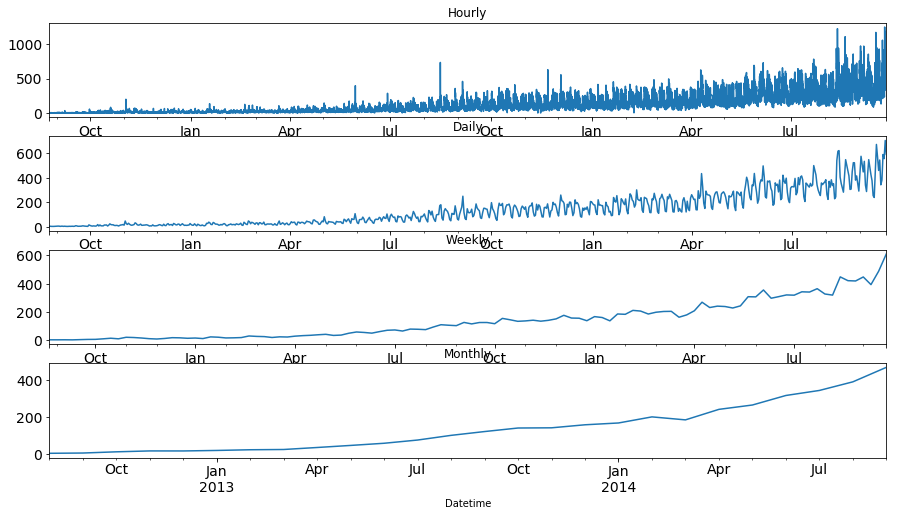

In [29]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8),title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

In [30]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [31]:
train.tail()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0
2014-09-24,702.333333,2014.0,9.0,24.0,11.5,2.0,0.0
2014-09-25,589.666667,2014.0,9.0,25.0,11.5,3.0,0.0


In [32]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

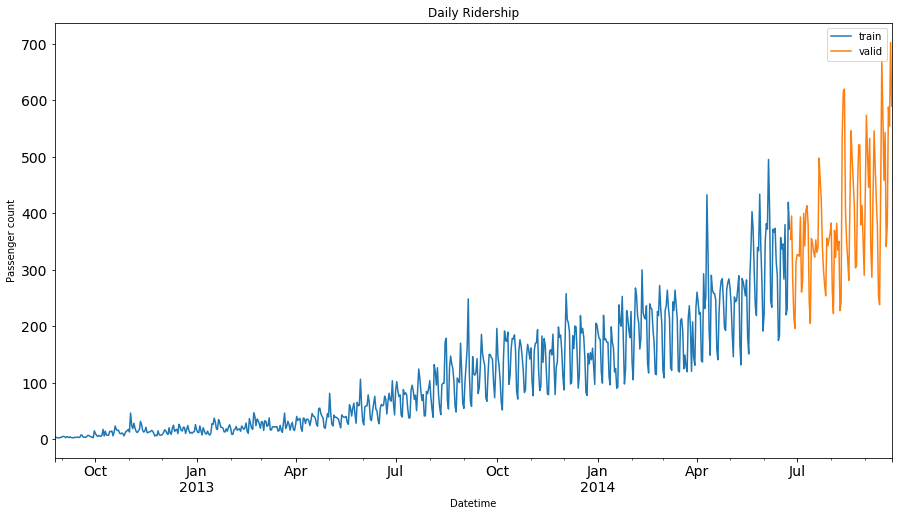

In [33]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()


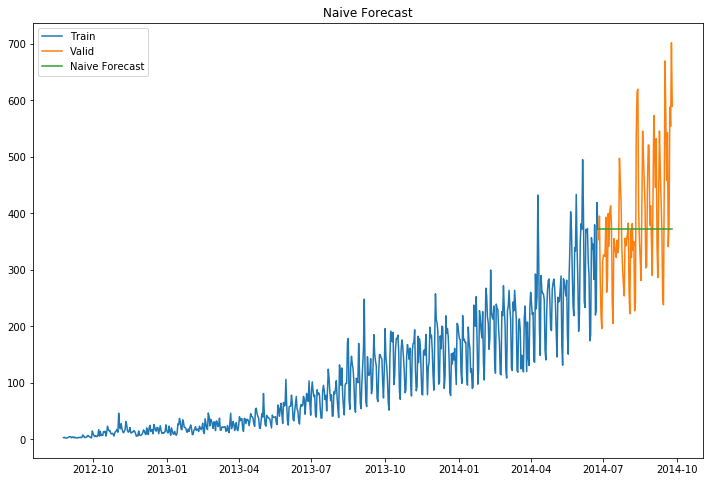

In [34]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


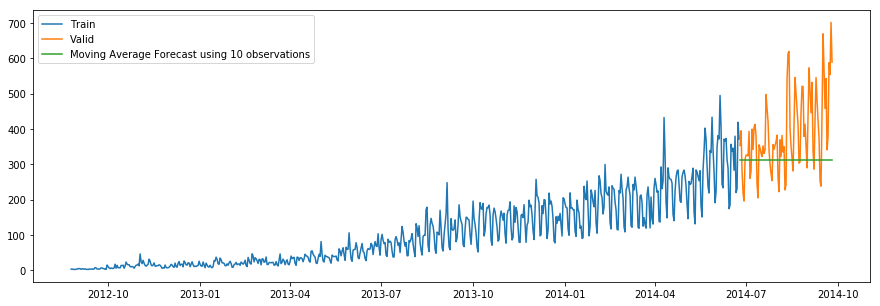

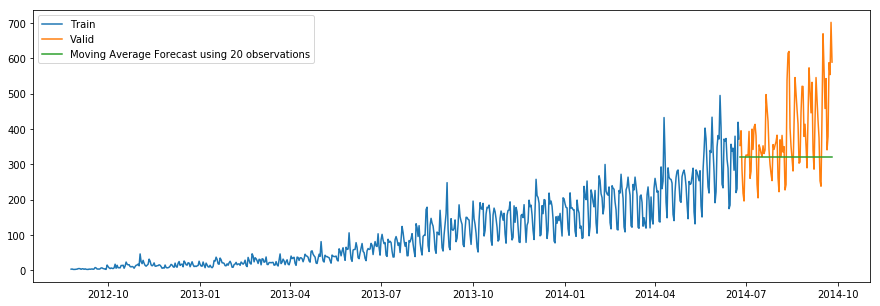

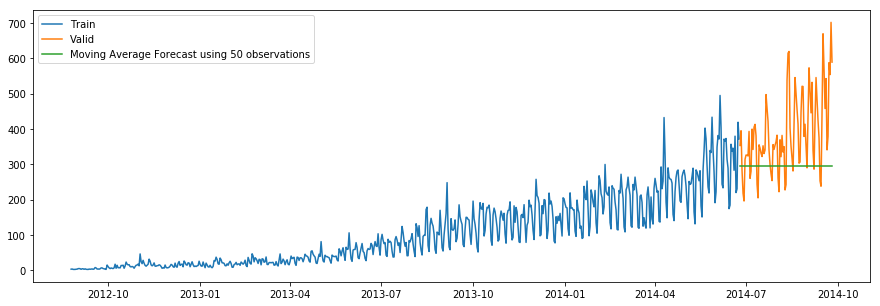

In [36]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [37]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802


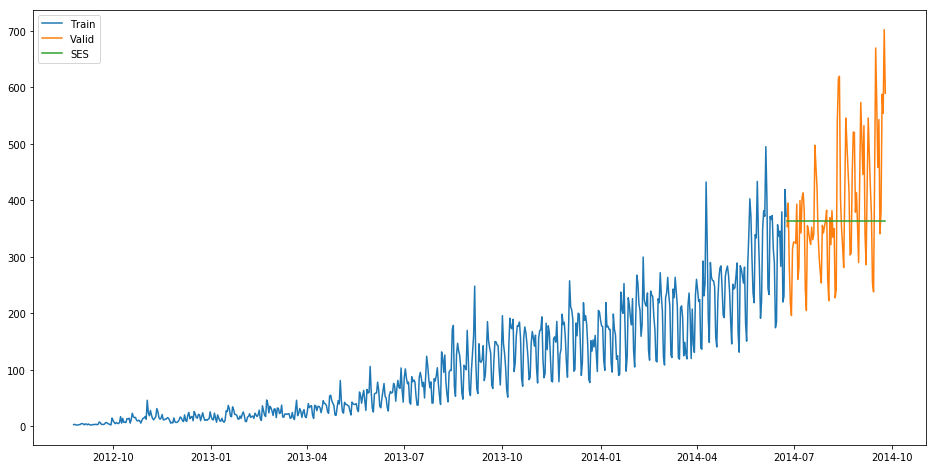

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [39]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


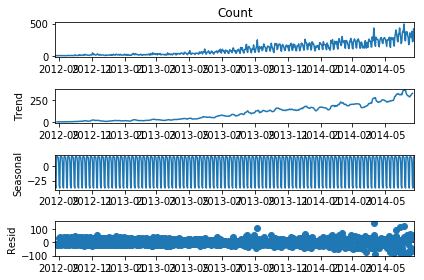

In [40]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

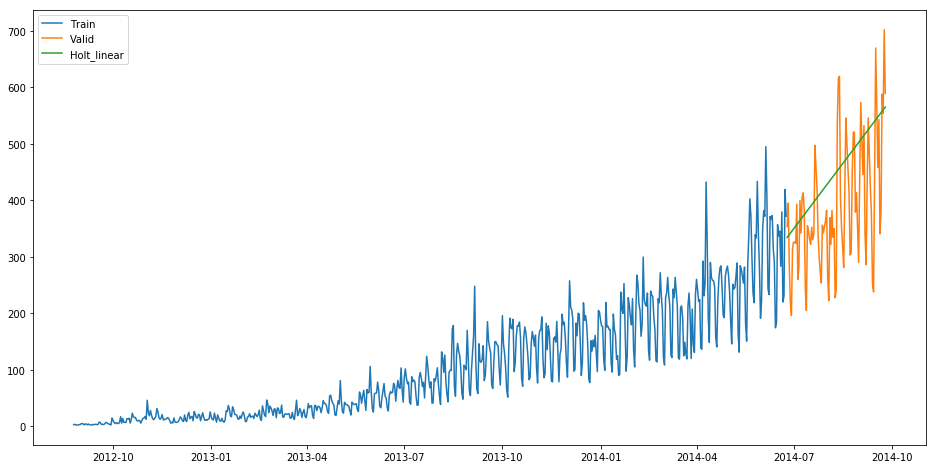

In [41]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [42]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


In [43]:
#submission=pd.read_csv("submission.csv")

In [44]:
predict=fit1.forecast(len(test))

In [45]:
test['prediction']=predict

In [46]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

# Grouping the hourly ratio 
temp=train_original.groupby(['Hour'])['ratio'].sum() 

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [47]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

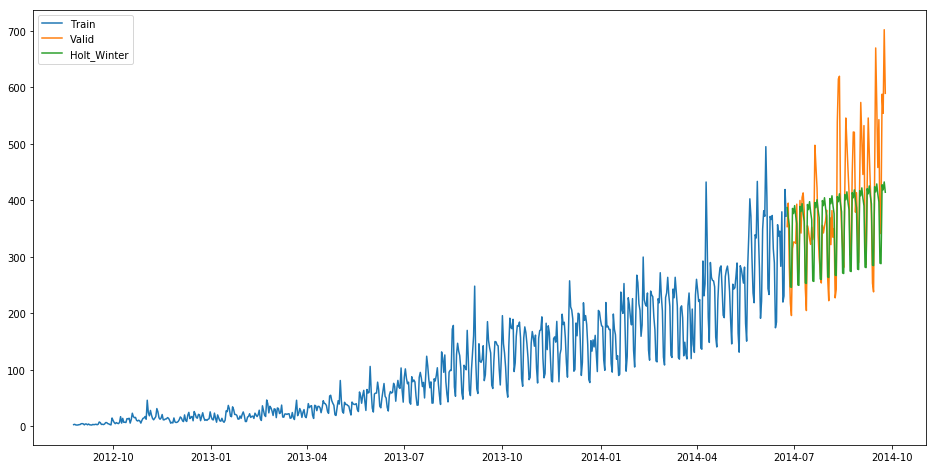

In [48]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [49]:
y_hat_avg.head()

,Count,year,month,day,Hour,day of week,weekend,Holt_Winter
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,387.355689
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,369.132555
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,355.558877
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,247.087637
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,246.189940


In [50]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.38041226792582


In [51]:
predict=fit1.forecast(len(test))
test['prediction']=predict

In [52]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [53]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [54]:
y_hat_avg.head()

,Count,year,month,day,Hour,day of week,weekend,Holt_Winter
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,387.355689
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,369.132555
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,355.558877
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,247.087637
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,246.189940


In [55]:
predict=fit1.forecast(len(test))
test_original.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [56]:
test['prediction']=predict
print(test.head())
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
print(merge.head())
merge['Hour']=merge['Hour_y'] 

merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
merge.head()

                 ID    year  month   day  Hour  prediction
Datetime                                                  
2014-09-26  18299.5  2014.0    9.0  26.0  11.5  387.355689
2014-09-27  18323.5  2014.0    9.0  27.0  11.5  369.132555
2014-09-28  18347.5  2014.0    9.0  28.0  11.5  355.558877
2014-09-29  18371.5  2014.0    9.0  29.0  11.5  247.087637
2014-09-30  18395.5  2014.0    9.0  30.0  11.5  246.189940
      ID_x    year  month   day  Hour_x  prediction   ID_y  \
0  18299.5  2014.0    9.0  26.0    11.5  387.355689  18288   
1  18299.5  2014.0    9.0  26.0    11.5  387.355689  18289   
2  18299.5  2014.0    9.0  26.0    11.5  387.355689  18290   
3  18299.5  2014.0    9.0  26.0    11.5  387.355689  18291   
4  18299.5  2014.0    9.0  26.0    11.5  387.355689  18292   

             Datetime  Hour_y  
0 2014-09-26 00:00:00       0  
1 2014-09-26 01:00:00       1  
2 2014-09-26 02:00:00       2  
3 2014-09-26 03:00:00       3  
4 2014-09-26 04:00:00       4  


,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,387.355689,18288,0
1,18299.5,26.0,387.355689,18289,1
2,18299.5,26.0,387.355689,18290,2
3,18299.5,26.0,387.355689,18291,3
4,18299.5,26.0,387.355689,18292,4


In [57]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale prediction['Count']=prediction['prediction']*prediction['ratio']*24


In [58]:
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [59]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

In [60]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,ID
0,18299.5,26.0,387.355689,18288,0,0.044287,18288
1,18299.5,26.0,387.355689,18289,1,0.035343,18289
2,18299.5,26.0,387.355689,18290,2,0.029911,18290
3,18299.5,26.0,387.355689,18291,3,0.024714,18291
4,18299.5,26.0,387.355689,18292,4,0.020802,18292


In [61]:
submission.head()

,ID
0,18288
1,18289
2,18290
3,18291
4,18292


In [62]:
test_original.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [63]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [64]:
submission.head()

,ID
0,18288
1,18289
2,18290
3,18291
4,18292


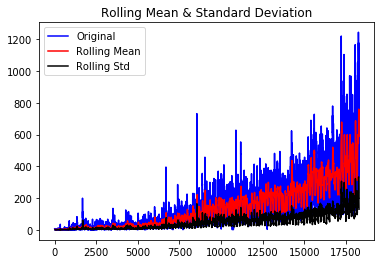

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [65]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean =pd.Series(timeseries).rolling( window=24).mean() # 24 hours on each day
    rolstd = pd.Series(timeseries).rolling(window=24).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#from matplotlib.pylab import rcParams 
#rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

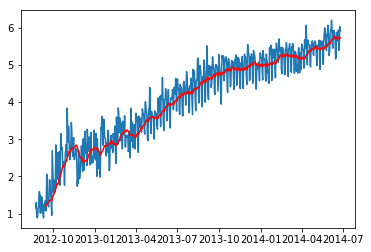

In [66]:
#log will neutralize the 
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = pd.Series(Train_log).rolling(window=24).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [67]:
train_log_moving_avg_diff = Train_log - moving_avg

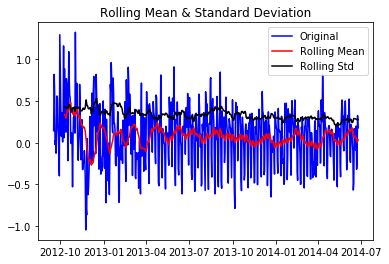

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [68]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

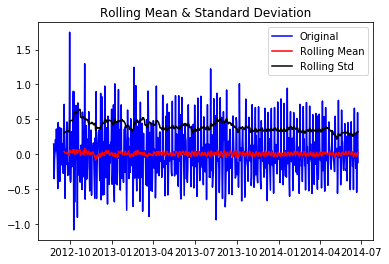

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [69]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())


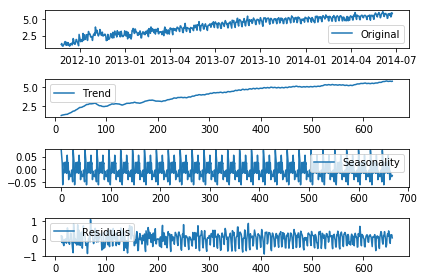

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

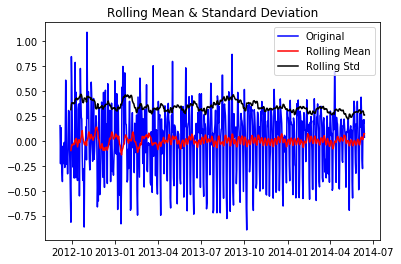

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [71]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [72]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

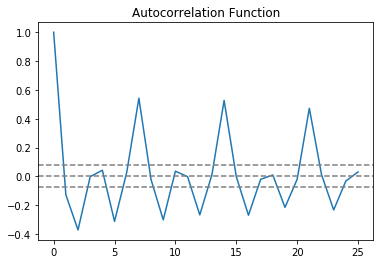

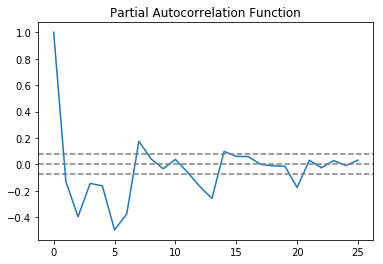

In [73]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.show()


In [74]:
# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.

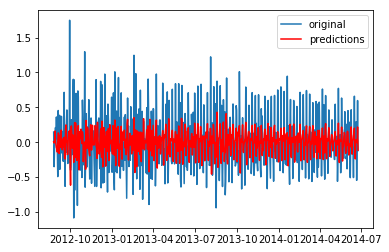

In [75]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

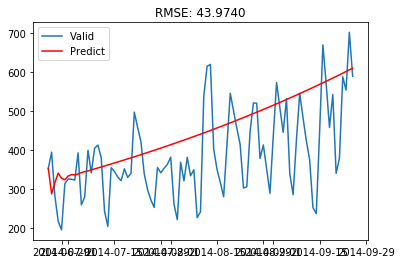

In [77]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.rcParams['figure.figsize']=(9,3)
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()


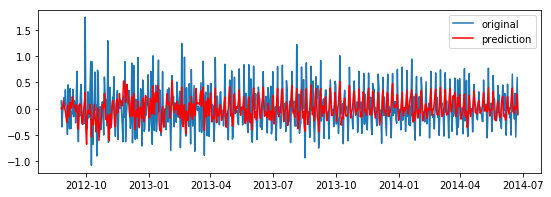

In [78]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

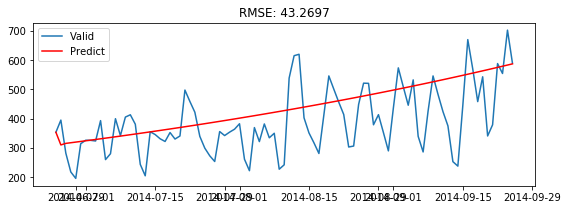

In [79]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

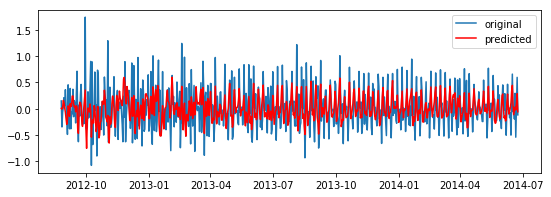

In [80]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()


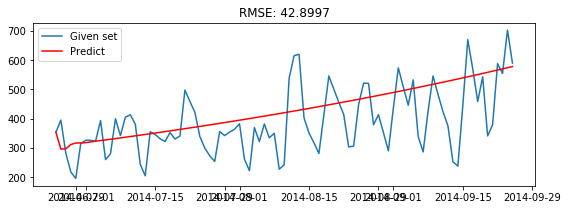

In [81]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()
#Let’s predict the values for validation set.

ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

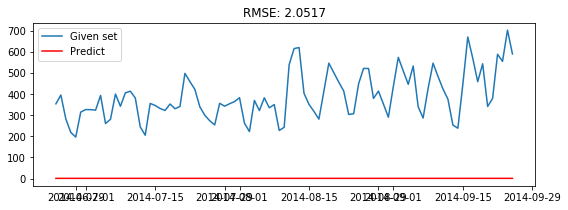

In [82]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_log(ARIMA_predict_diff, valid)

C:\Users\Sai Pavan\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


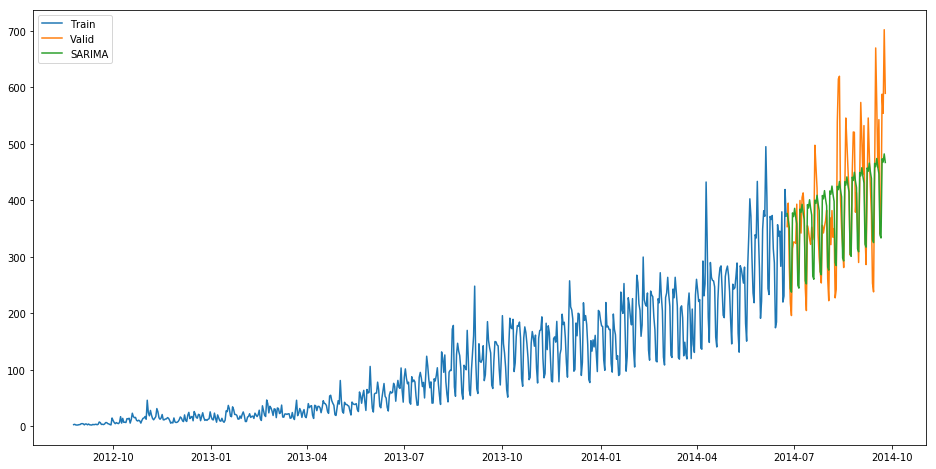

In [84]:
import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [86]:
y_hat_avg.head()

,Count,year,month,day,Hour,day of week,weekend,SARIMA
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,376.760075
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,365.209334
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,352.075800
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,243.821820
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,237.644960


In [87]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

69.67242279085332


In [88]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

C:\Users\Sai Pavan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [92]:
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale prediction['Count']=prediction['prediction']*prediction['ratio']*24
#Let’s drop all variables other than ID and Count

prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')